In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

#new imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

#### Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

In [3]:
df = acquire.get_titanic_data()

csv file found and loaded


In [4]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [5]:
train, validate, test = prepare.prep_titanic_data(df)

In [6]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,male,0,0,7.8958,Cherbourg,1,1,0,0
380,380,1,1,female,0,0,227.5250,Cherbourg,1,0,0,0
492,492,0,1,male,0,0,30.5000,Southampton,1,1,0,1
55,55,1,1,male,0,0,35.5000,Southampton,1,1,0,1
243,243,0,3,male,0,0,7.1250,Southampton,1,1,0,1


#### What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [8]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [14]:
train.survived

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [12]:
baseline_accuracy = (train.survived == 0).mean()
baseline_accuracy

0.6161048689138576

#### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

0. Split into my X and y

In [15]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,male,0,0,7.8958,Cherbourg,1,1,0,0
380,380,1,1,female,0,0,227.5250,Cherbourg,1,0,0,0
492,492,0,1,male,0,0,30.5000,Southampton,1,1,0,1
55,55,1,1,male,0,0,35.5000,Southampton,1,1,0,1
243,243,0,3,male,0,0,7.1250,Southampton,1,1,0,1


In [25]:
# pd.concat([train.iloc[:,1:3], train.iloc[:,5:]], axis=1)

In [30]:
X_train = train.drop(columns=['survived', 'passenger_id', 'sex', 'embark_town'])
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [31]:
X_validate = validate.drop(columns=['survived', 'passenger_id', 'sex', 'embark_town'])
X_test = test.drop(columns=['survived', 'passenger_id', 'sex', 'embark_town'])

In [35]:
y_train = train.survived
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [36]:
y_validate = validate.survived
y_test = test.survived

1. create the object

In [38]:
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

2. fit the object

In [39]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
tree.predict(X_train)[:5]

array([0, 1, 0, 1, 0])

In [41]:
tree.score(X_train, y_train)

0.9456928838951311

#### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [44]:
tree.score(X_train, y_train)

0.9456928838951311

In [46]:
y_pred = tree.predict(X_train)

In [52]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[327,   2],
       [ 27, 178]])

In [51]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [56]:
pd.DataFrame(conf)

,0,1
0,327,2
1,27,178


In [59]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       329
           1       0.99      0.87      0.92       205

    accuracy                           0.95       534
   macro avg       0.96      0.93      0.94       534
weighted avg       0.95      0.95      0.94       534



#### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [61]:
conf

array([[327,   2],
       [ 27, 178]])

In [63]:
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,327,2
1_actual,27,178


positive case = survive

In [64]:
conf.ravel()

array([327,   2,  27, 178])

In [65]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(327, 2, 27, 178)

In [66]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [67]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.9456928838951311

True Positive Rate/Sensitivity/Recall/Power: 0.8682926829268293
False Positive Rate/False Alarm Ratio/Fall-out: 0.0060790273556231
True Negative Rate/Specificity/Selectivity: 0.993920972644377
False Negative Rate/Miss Rate: 0.13170731707317074

Precision/PPV: 0.9888888888888889
F1 Score: 0.9246753246753248

Support (0): 205
Support (1): 329


#### Run through steps 2-4 using a different max_depth value.

In [68]:
#for one
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.7921348314606742

In [85]:
#for lots
for x in range(1,20):
#     print(x)
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.79
for depth of  2, the accuracy is 0.79
for depth of  3, the accuracy is 0.82
for depth of  4, the accuracy is 0.82
for depth of  5, the accuracy is 0.83
for depth of  6, the accuracy is 0.86
for depth of  7, the accuracy is 0.86
for depth of  8, the accuracy is 0.9
for depth of  9, the accuracy is 0.91
for depth of 10, the accuracy is 0.92
for depth of 11, the accuracy is 0.93
for depth of 12, the accuracy is 0.93
for depth of 13, the accuracy is 0.94
for depth of 14, the accuracy is 0.94
for depth of 15, the accuracy is 0.94
for depth of 16, the accuracy is 0.95
for depth of 17, the accuracy is 0.95
for depth of 18, the accuracy is 0.95
for depth of 19, the accuracy is 0.95


#### Which model performs better on your in-sample data?

my models with a max depth of 16 or greater perform the best! with in-sample data

#### Which model performs best on your out-of-sample data, the validate set?

<div class="alert alert-block alert-success">

Another reason why we use random_state. We are re training this model and could produce slightly different results

In [91]:
scores_all = []

for x in range(1,20):

    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = tree.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])

In [95]:
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.head()

,max_depth,train_acc,val_acc
0,1,0.792135,0.775281
1,2,0.792135,0.775281
2,3,0.818352,0.792135
3,4,0.820225,0.792135
4,5,0.833333,0.735955


In [97]:
scores_df['diff'] = scores_df.train_acc - scores_df.val_acc

In [100]:
scores_df.sort_values('diff').head()

,max_depth,train_acc,val_acc,diff
0,1,0.792135,0.775281,0.016854
1,2,0.792135,0.775281,0.016854
2,3,0.818352,0.792135,0.026217
3,4,0.820225,0.792135,0.028090
5,6,0.859551,0.780899,0.078652


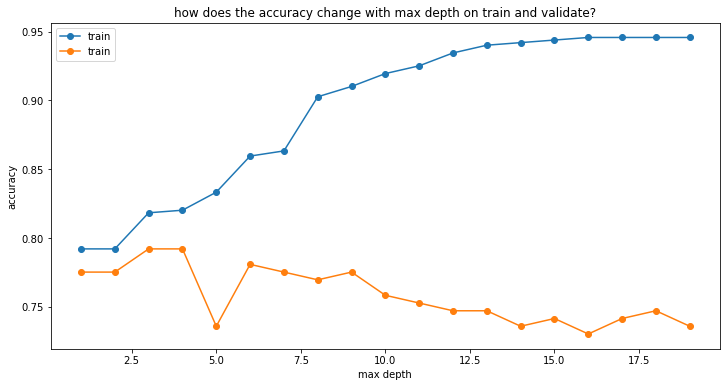

In [111]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='test', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

<div class='alert alert-block alert-success'>
SIDE NOTE

Overfitting vs Underfitting

- imagine a scatter plot so theres an x and y axis with various data points
- Overfitting would be drawing a line through every single point of that line
- Underfitting would be drawing a straight line horizontally so hitting a small minority of the data

- There are 2 things we can do to fix this
    - take some rows of data and don’t use it during model building. Use this as a holdout dataset to validate if the model can make predictions on unseen data . This is very basic
    - More standard way is to use k fold cross validation `cross_validate()` in sklearn
    - its got tougher skin and not as susceptible to overfitting and under-fitting
        - k fold Cross-validation involves splitting a dataset into k parts
            - well say 3 parts
            - in the first cycle part 1 is used as a holdout dataset and parts 2 & 3 are used for model building
            - then part 2 is used as a holdout dataset and parts 1 & 3 are used for model building
            - finally part 3 is used as a holdout dataset and parts 1 & 2 are used for model building
            - last we average each of the results from the holdout datasets taken from each part and use this to estimate the models performance.
        - with each section used for training and evaluating the model. In a standard cross-validation approach, each fold is used exactly once for evaluation and the results are averaged to obtain an estimate of the model's performance.

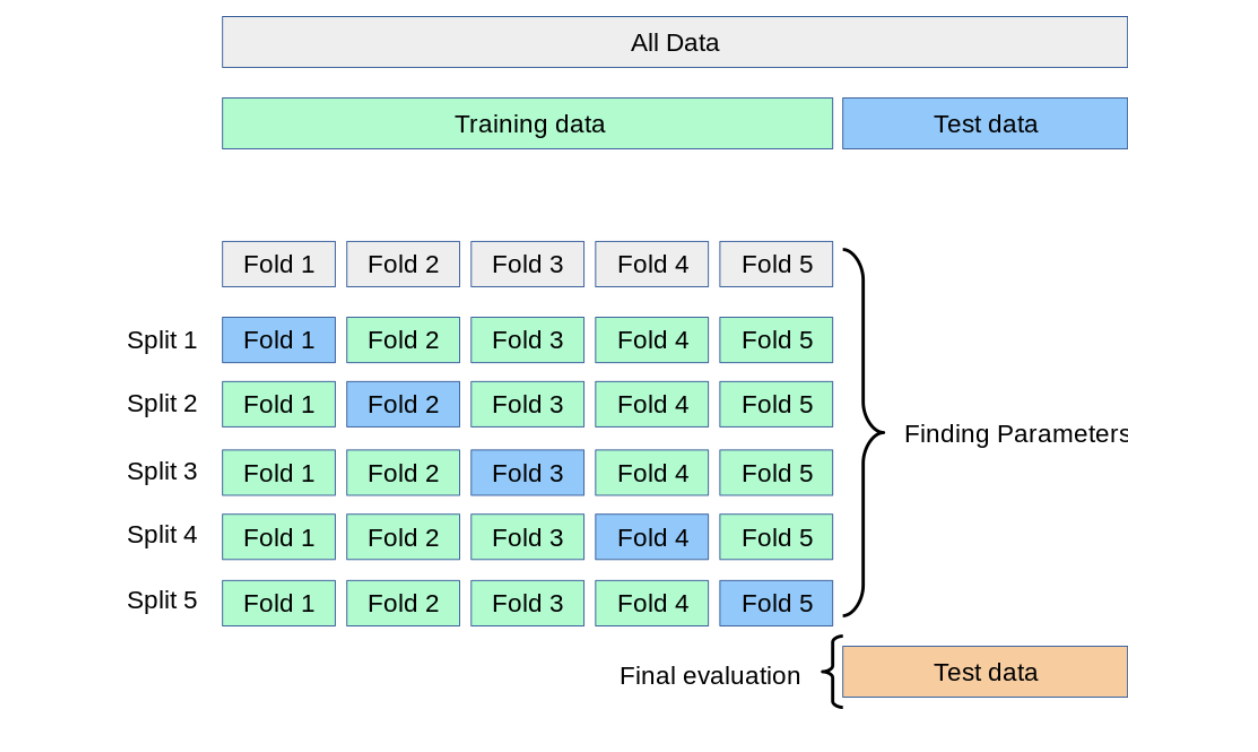

WHAT IT LOOKS LIKE IN A DATA SCIENTIST'S PLOT

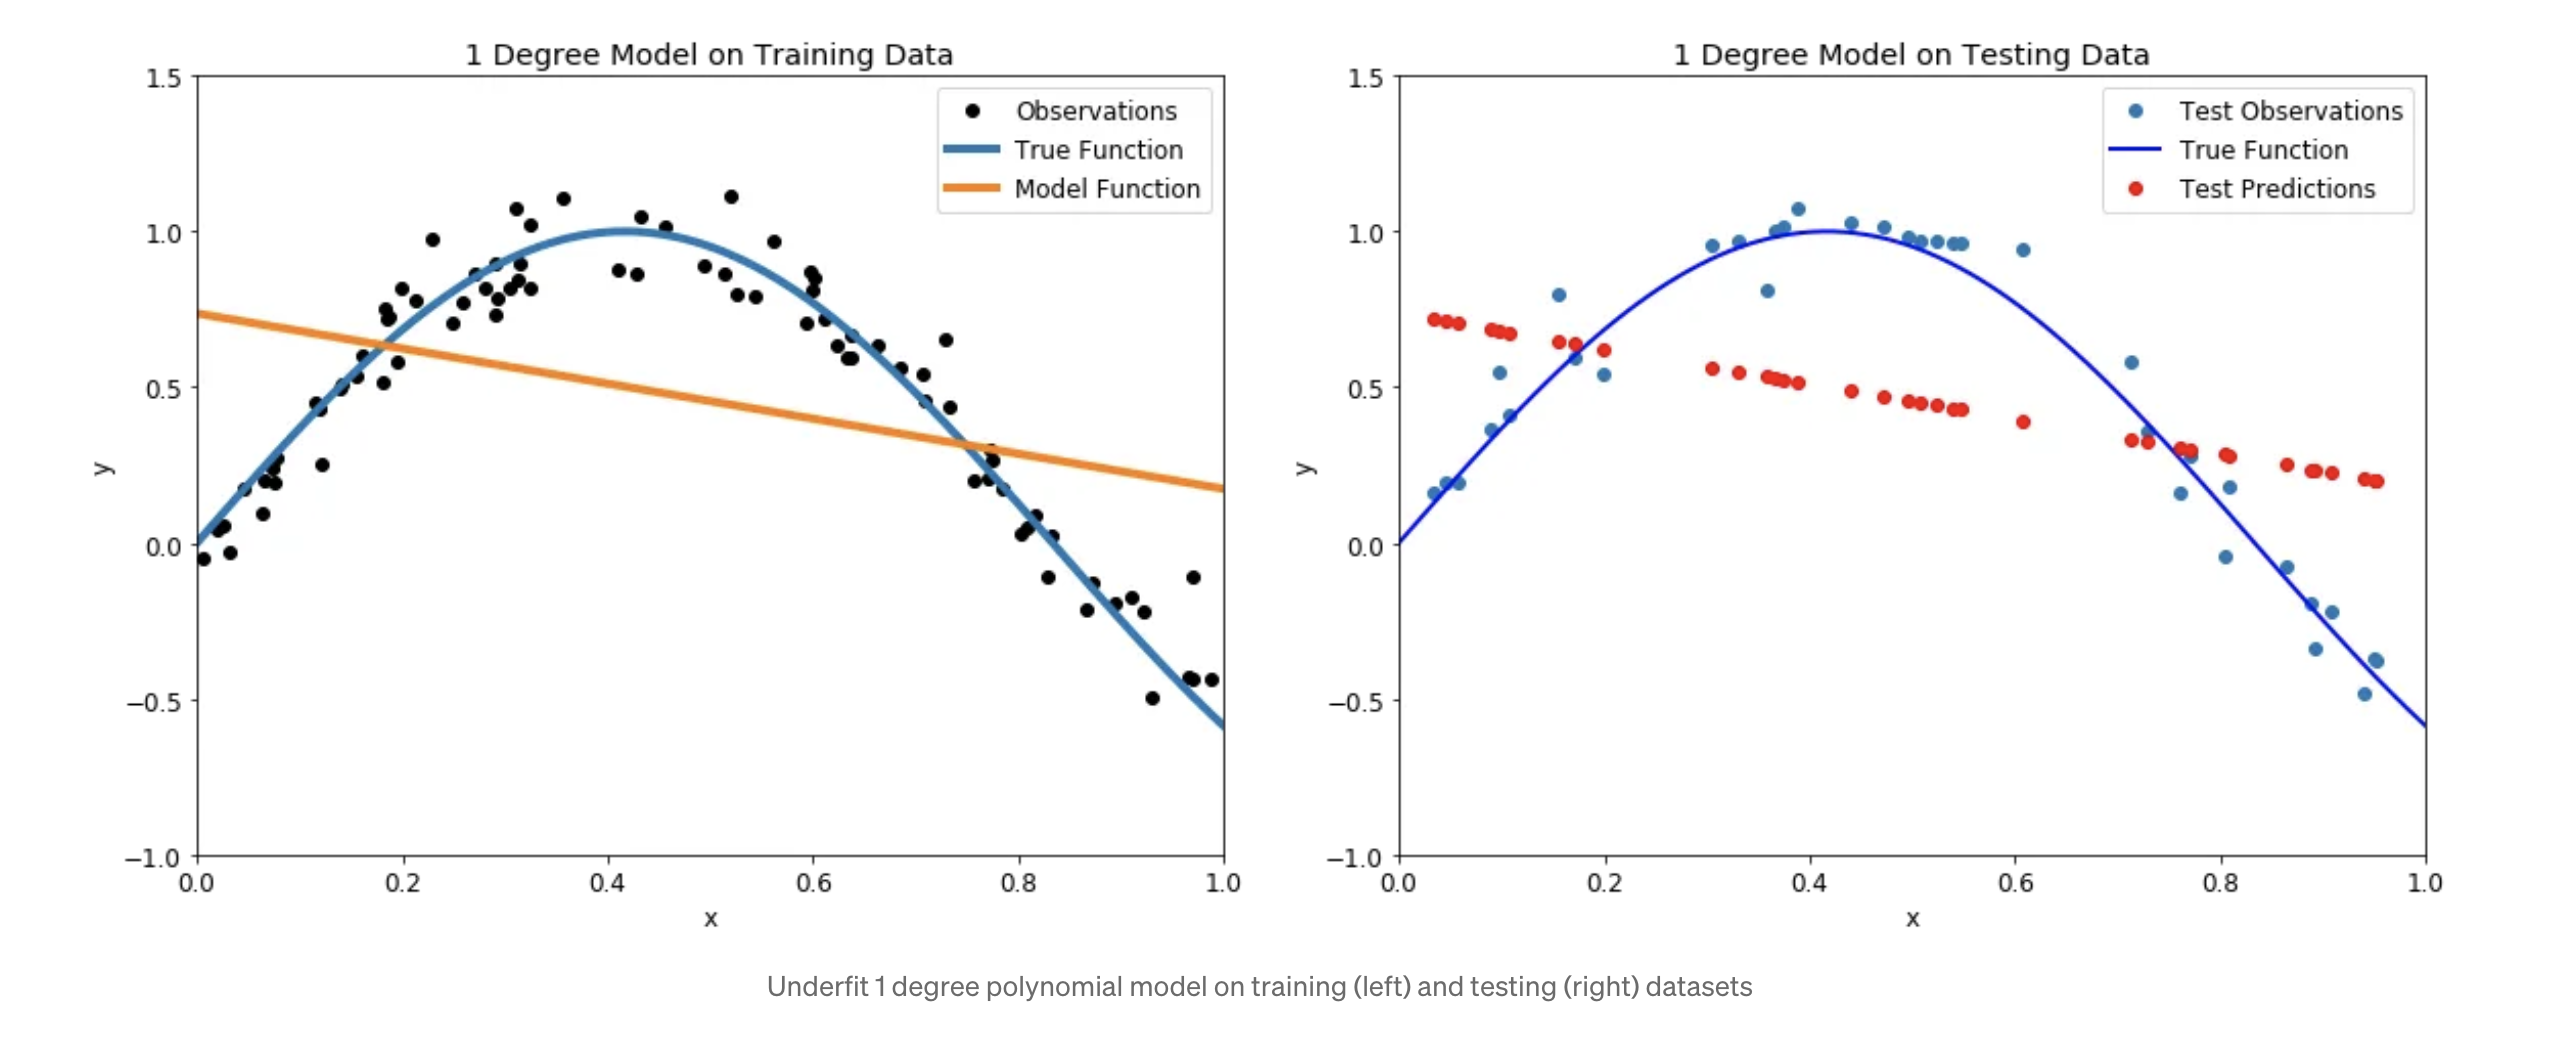

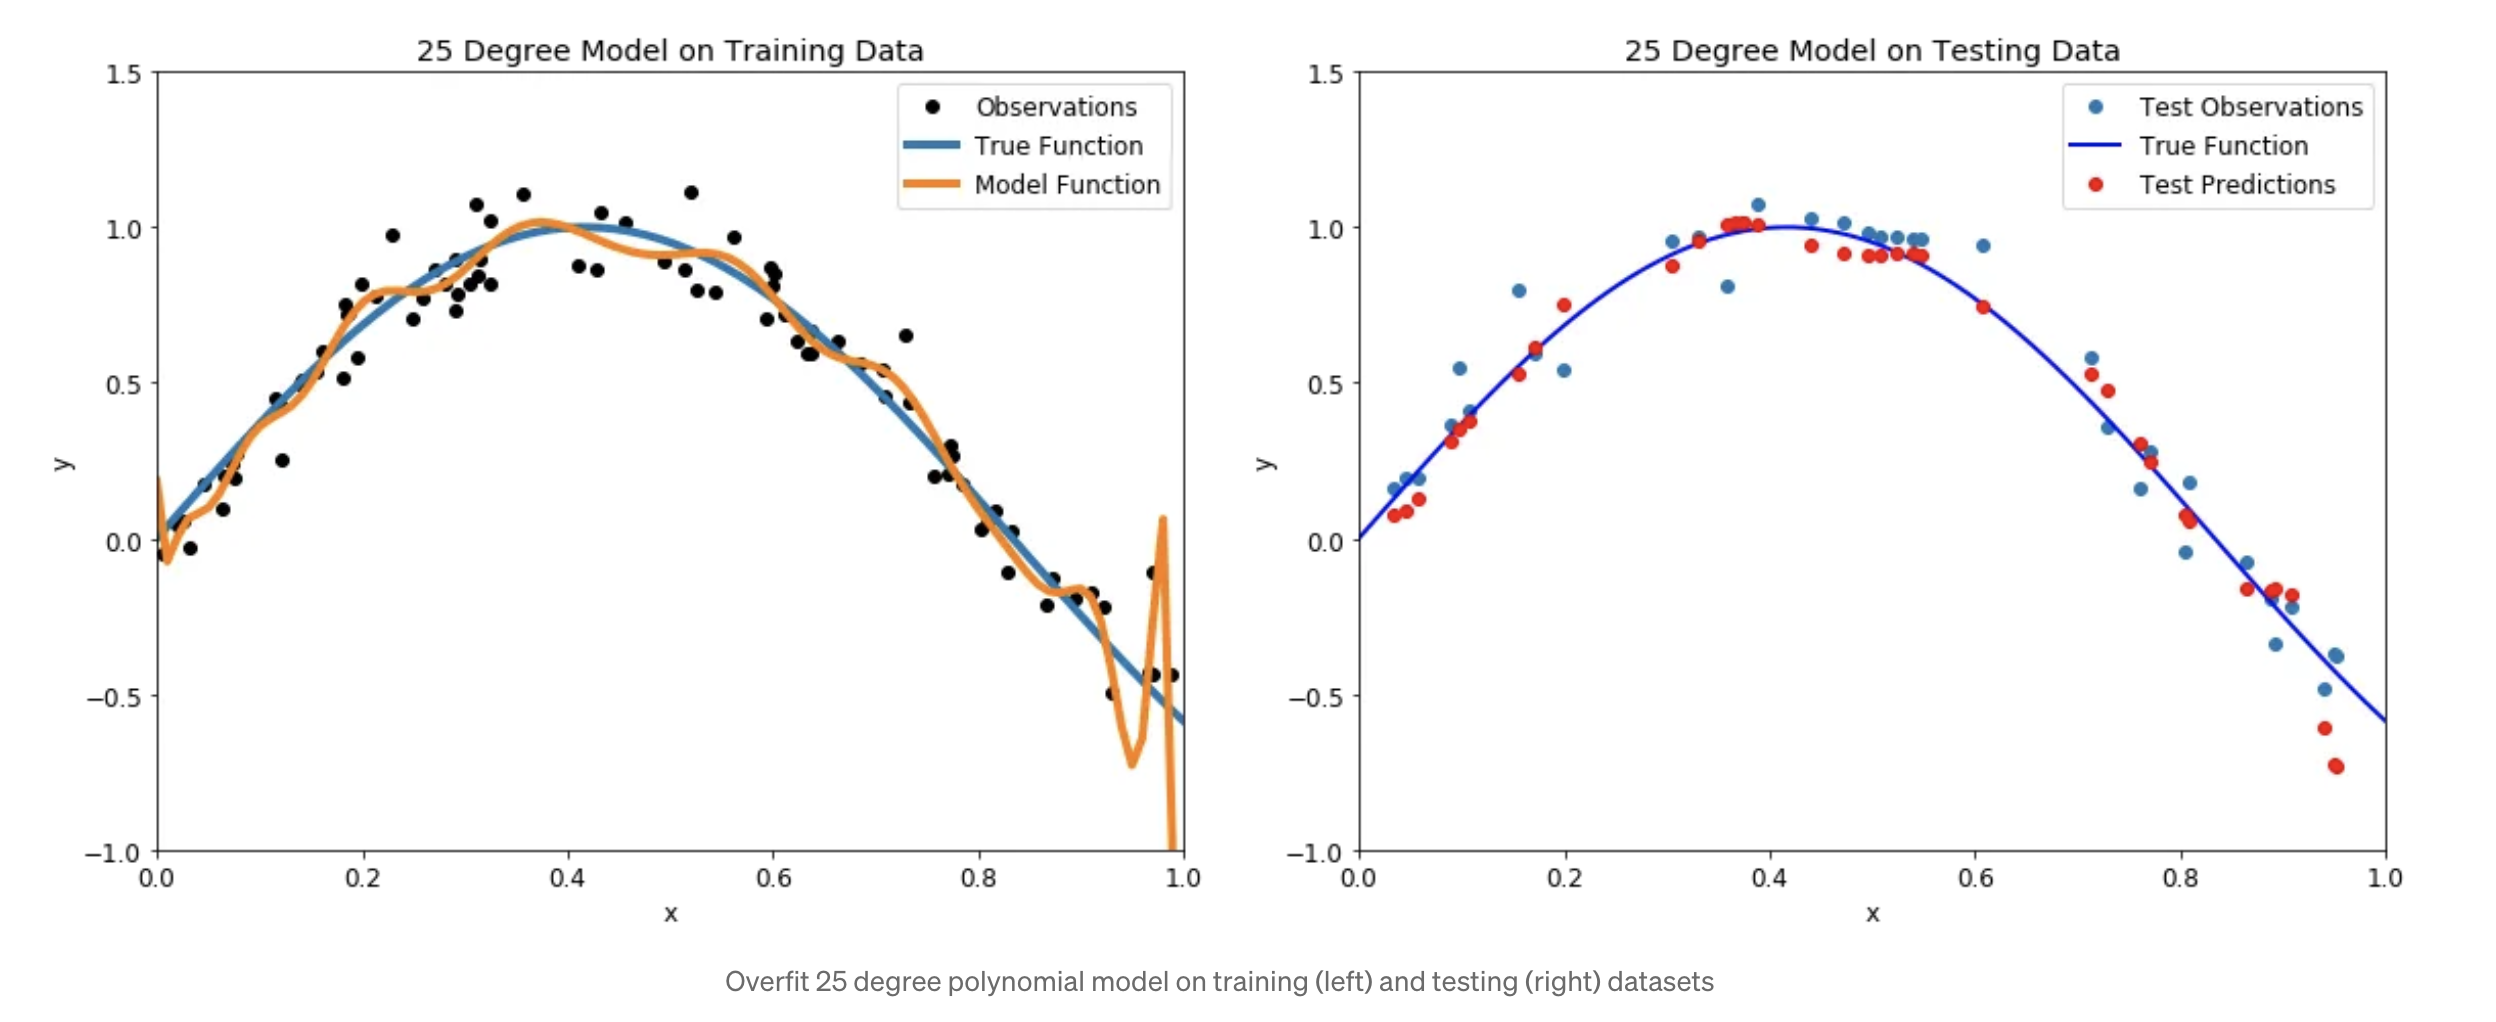

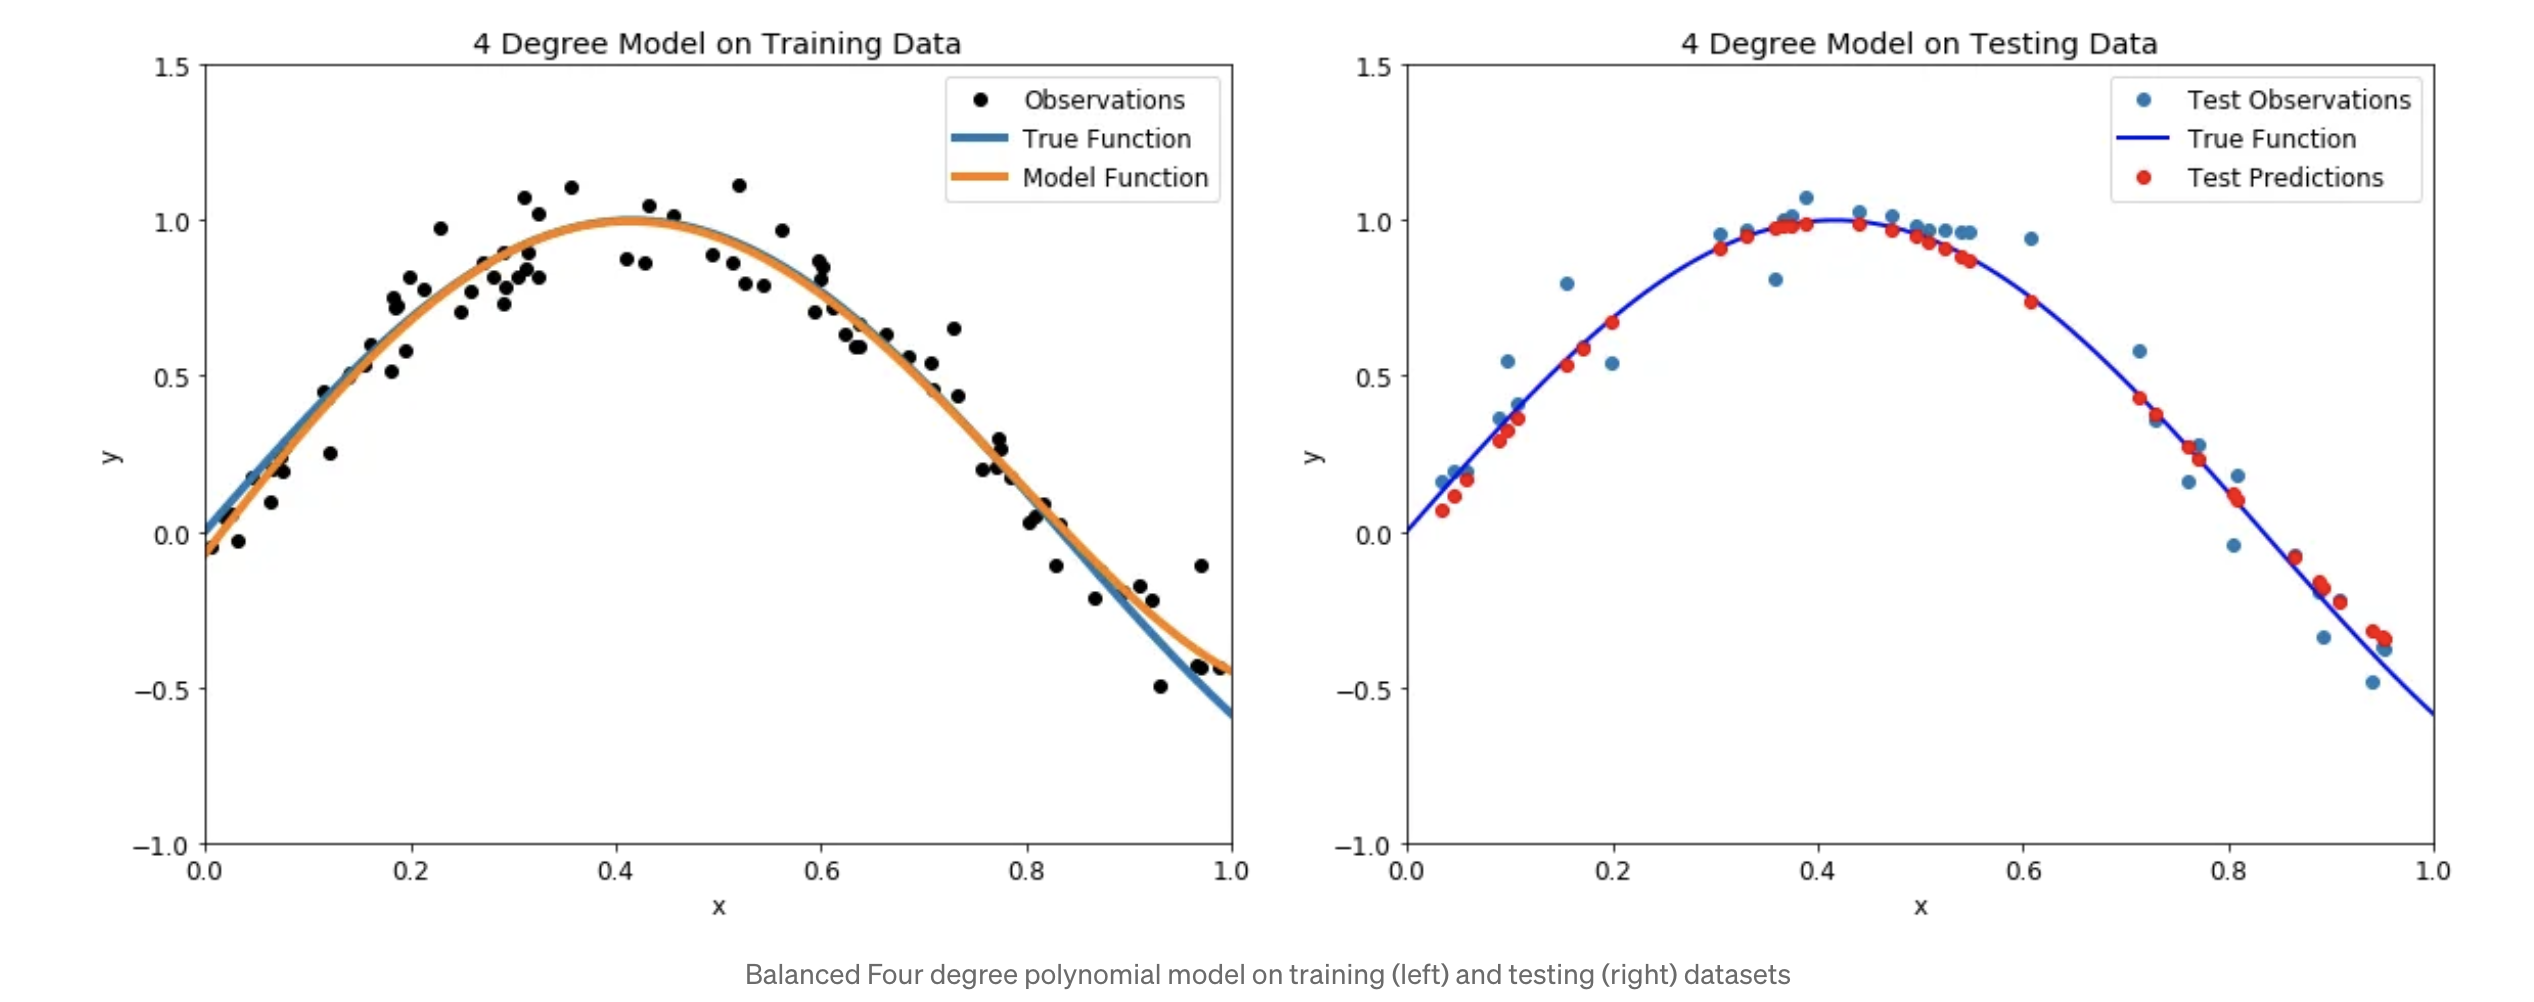